# Projeto de An√°lise de Dados de E-commerce

## Introdu√ß√£o

O setor de e-commerce tem crescido exponencialmente, sendo uma fonte rica de dados que, quando analisados, podem fornecer insights valiosos sobre o comportamento do consumidor. No entanto, conjuntos de dados de e-commerce geralmente s√£o propriet√°rios e n√£o est√£o dispon√≠veis para pesquisa p√∫blica.

Esse projeto utiliza o conjunto de dados "Online Retail", disponibilizado pelo UCI Machine Learning Repository (https://www.kaggle.com/datasets/carrie1/ecommerce-data), que re√∫ne transa√ß√µes de um varejista online baseado no Reino Unido entre dezembro de 2010 e dezembro de 2011.

Com a an√°lise deste conjunto de dados, o projeto busca entender padr√µes de compra, segmentar consumidores e definir estrat√©gias para reten√ß√£o e fideliza√ß√£o, com potencial aplica√ß√£o em otimiza√ß√£o de campanhas e marketing direcionado.

### Sobre o conjunto de dados

**Origem**: Transa√ß√µes realizadas em um varejo online do Reino Unido.  
**Per√≠odo**: 01/12/2010 a 09/12/2011.  
**Descri√ß√£o**: A empresa vende principalmente presentes exclusivos e atende tanto consumidores finais quanto atacadistas.  

## Objetivos


### Objetivo Geral:

- Analisar o comportamento de compra dos clientes atrav√©s de t√©cnicas de segmenta√ß√£o, m√©tricas de valor do cliente e modelos de agrupamento.

### Objetivos Espec√≠ficos:

- Realizar tratamento de dados para garantir a qualidade e confiabilidade das an√°lises.  

- Implementar an√°lises de cohort para entender a reten√ß√£o e o comportamento ao longo do tempo.  

- Aplicar a An√°lise de Pareto para identificar os clientes mais valiosos (20% dos clientes respons√°veis por 80% das vendas).

- Realizar uma an√°lise de RFM (Rec√™ncia, Frequ√™ncia e Valor Monet√°rio) para segmenta√ß√£o de clientes.

- Utilizar t√©cnicas de clusteriza√ß√£o para identificar padr√µes de clientes e potencializar estrat√©gias de marketing personalizadas.


## Limpeza e Transforma√ß√£o de Dados

Nesta parte, iremos realizar o tratamento dos dados, que inclui a identifica√ß√£o e corre√ß√£o de valores ausentes e remo√ß√£o de transa√ß√µes com devolu√ß√µes ou erros.

### Importando bibiotecas

Primeiramente, vamos importar as bibliotecas necess√°rias para o tratamento e a an√°lise dos dados.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Lendo base de dados

Em seguida, lemos o arquivo com a biblioteca Pandas e o transformamos em um dataframe para facilitar o tratamento e a an√°lise dos dados

In [13]:
base = pd.read_csv("data.csv", encoding='latin1')

### Descri√ß√£o dos dados

**InvoiceNo:** C√≥digo que representa cada transa√ß√£o √∫nica. Se o c√≥digo come√ßa com 'c', indica um cancelamento.   
**StockCode:** C√≥digo atribu√≠do exclusivamente a cada produto distinto (c√≥digo de estoque).  
**Description:** Descri√ß√£o de cada produto.  
**Quantity:** Quantidade de unidades de um produto em uma transa√ß√£o.  
**InvoiceDate:** Data e hora da transa√ß√£o.  
**UnitPrice:** Pre√ßo unit√°rio do produto em libras esterlinas.  
**CustomerID:** Identificador √∫nico atribu√≠do a cada cliente.  
**Country:** Pa√≠s do cliente.  

## An√°lise inicial

### Vis√£o geral da base de dados

O pr√≥ximo passo √© entender o formato da base e seus campos antes de prosseguir para a etapa de tratamento dos dados.

In [15]:
base.head()

InvoiceNo StockCode  ... CustomerID         Country
0    536365    85123A  ...    17850.0  United Kingdom
1    536365     71053  ...    17850.0  United Kingdom
2    536365    84406B  ...    17850.0  United Kingdom
3    536365    84029G  ...    17850.0  United Kingdom
4    536365    84029E  ...    17850.0  United Kingdom

[5 rows x 8 columns]

In [17]:
base.describe().T

count          mean          std  ...       50%       75%      max
Quantity    541909.0      9.552250   218.081158  ...      3.00     10.00  80995.0
UnitPrice   541909.0      4.611114    96.759853  ...      2.08      4.13  38970.0
CustomerID  406829.0  15287.690570  1713.600303  ...  15152.00  16791.00  18287.0

[3 rows x 8 columns]

In [19]:
base.describe(include='object').T

count unique                                 top    freq
InvoiceNo    541909  25900                              573585    1114
StockCode    541909   4070                              85123A    2313
Description  540455   4223  WHITE HANGING HEART T-LIGHT HOLDER    2369
InvoiceDate  541909  23260                    10/31/2011 14:41    1114
Country      541909     38                      United Kingdom  495478

In [21]:
missing_data = base.isnull().sum() # Valores nulos
total_records = base.shape[0] # Quantidade de registros
data_types = base.dtypes # Verificando tipo de dado

# Criando um dataframe com as informa√ß√µes sobre a base analisada
summary_table = pd.DataFrame({
    'Tipo de dado': data_types,
    'Quantidade de registros': total_records,
    'Registros n√£o nulos': total_records - missing_data,
    'Registros nulos': missing_data,
    'Percentual de nulos (%)': round((missing_data / total_records) * 100,2)
})

summary_table

Tipo de dado  ...  Percentual de nulos (%)
InvoiceNo         object  ...                     0.00
StockCode         object  ...                     0.00
Description       object  ...                     0.27
Quantity           int64  ...                     0.00
InvoiceDate       object  ...                     0.00
UnitPrice        float64  ...                     0.00
CustomerID       float64  ...                    24.93
Country           object  ...                     0.00

[8 rows x 5 columns]

Aqui, j√° conseguimos identificar algumas oportunidades:

- **CustomerID**, que deveria ser uma vari√°vel de texto, est√° no formato num√©rico (vamos precisar converter);
- **InvoiceDate** est√° no formato de objeto e precisa ser convertido para formato de data;
- Al√©m disso, h√° alguns dados nulos no dataframe, e ser√° necess√°rio decidir se vamos mant√™-los ou exclu√≠-los antes de prosseguir com a an√°lise dos dados.
- **Quantity** e **UnitPrice** apresentam valores negativos, indicando que provavelmente s√£o casos de cancelamentos.

### Dados nulos

Para construir uma base mais confi√°vel e limpa, vamos remover os dados ausentes das colunas **CustomerID** e **Description**:

In [23]:
print("A base inicial possui {} observa√ß√µes.".format(base.shape[0]))

# Removendo linhas com valores ausentes nas colunas 'CustomerID' e 'Description'
base = base.dropna(subset=['CustomerID', 'Description'])

print("Ap√≥s excluir os casos nulos, temos {} observa√ß√µes.".format(base.shape[0]))

A base inicial possui 541909 observa√ß√µes.
Ap√≥s excluir os casos nulos, temos 406829 observa√ß√µes.


In [16]:
base.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Verificando casos duplicados

Agora, vamos identificar se temos informa√ß√µes duplicadas em nossa base de dados.

In [27]:
# Identificando valores duplicados
duplicate_rows = base[base.duplicated(keep=False)]

# Ordenando as colunas para verificar valores pr√≥ximos
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

duplicate_rows_sorted.head()

InvoiceNo StockCode  ... CustomerID         Country
494    536409     21866  ...    17908.0  United Kingdom
517    536409     21866  ...    17908.0  United Kingdom
485    536409     22111  ...    17908.0  United Kingdom
539    536409     22111  ...    17908.0  United Kingdom
489    536409     22866  ...    17908.0  United Kingdom

[5 rows x 8 columns]

In [29]:
# Mostrando a quantidade de linhas duplicadas
print(f"A base de dados cont√©m {base.duplicated().sum()} linhas duplicadas que ser√£o removidas.")

# Removendo linhas duplicadas
base = base.drop_duplicates()

# Mostrando nova quantidade do dataframe
print(f"Agora, o dataframe possui {base.shape[0]} linhas.")

A base de dados cont√©m 5225 linhas duplicadas que ser√£o removidas.
Agora, o dataframe possui 401604 linhas.


### Tratando opera√ß√µes canceladas

Aqui, a estrat√©gia consiste em remover os casos cancelados e prosseguir com a an√°lise dos dados.

In [31]:
# Cria uma nova coluna "Cancelled" usando np.where
base["status_operacao"] = np.where(base["InvoiceNo"].str.startswith("C"), 1, 0)

base[base["status_operacao"] == 1].head()

InvoiceNo StockCode  ...         Country  status_operacao
141   C536379         D  ...  United Kingdom                1
154   C536383    35004C  ...  United Kingdom                1
235   C536391     22556  ...  United Kingdom                1
236   C536391     21984  ...  United Kingdom                1
237   C536391     21983  ...  United Kingdom                1

[5 rows x 9 columns]

Confirmamos que os casos negativos correspondem a transa√ß√µes canceladas.

In [33]:
base[['Quantity']][base["status_operacao"] == 1].describe().T

count      mean          std      min  25%  50%  75%  max
Quantity  8872.0 -30.77491  1172.249902 -80995.0 -6.0 -2.0 -1.0 -1.0

In [35]:
# Calculando o n√∫mero de registros com status_operacao igual a 1
num_records = base[base["status_operacao"] == 1].shape[0]

# Calculando a porcentagem de registros com status_operacao igual a 1 em rela√ß√£o ao total da base
percentage = round(num_records / base.shape[0] * 100,2)

# Exibindo o resultado
print(f"N√∫mero de registros cancelados: {num_records}")
print(f"Porcentagem em rela√ß√£o √† base total: {percentage}%")

# Retirando cancelados
base = base[base["status_operacao"] == 0]

# removendo coluna de status da opera√ß√£o
base = base.drop(columns=['status_operacao'])

N√∫mero de registros cancelados: 8872
Porcentagem em rela√ß√£o √† base total: 2.21%


###  Tratando StockCode (c√≥digo de estoque)


Observamos que, enquanto a maioria dos c√≥digos de estoque √© composta por 5 ou 6 caracteres, h√° tamb√©m exce√ß√µes que precisam ser analisadas.

In [37]:
# Agrupando e contando o n√∫mero de linhas pelo comprimento dos c√≥digos de estoque
length_counts = base['StockCode'].apply(len).value_counts().sort_index()

length_counts

StockCode
1        285
2        133
3         16
4       1103
5     358309
6      32583
7        291
12        12
Name: count, dtype: int64

Al√©m da diferen√ßa no tamanho do c√≥digo, tamb√©m temos varia√ß√µes em seu formato. Alguns c√≥digos possuem apenas n√∫meros, enquanto outros cont√™m letras. Al√©m disso, existem alguns casos com o nome "POST", que provavelmente representa algum tipo diferente de servi√ßo.

In [39]:
base[~base['StockCode'].str.isnumeric()].head(5)

InvoiceNo StockCode  ... CustomerID         Country
0     536365    85123A  ...    17850.0  United Kingdom
2     536365    84406B  ...    17850.0  United Kingdom
3     536365    84029G  ...    17850.0  United Kingdom
4     536365    84029E  ...    17850.0  United Kingdom
45    536370      POST  ...    12583.0          France

[5 rows x 8 columns]

In [41]:
print(f"Existem {base[base['StockCode'] == 'POST'].shape[0]} casos que possuem o nome POST")

Existem 1099 casos que possuem o nome POST


Nesse caso, desconsideraremos os casos acima, pois eles fogem ao padr√£o dos demais c√≥digos.

In [43]:
base = base[base['StockCode'] != "POST"]

Al√©m desses casos, √© importante verificar se n√£o encontramos outros tipos com esse padr√£o semelhante:

In [36]:
base['StockCode'][base['StockCode'].str.isalpha()].unique()

array(['M', 'PADS', 'DOT'], dtype=object)

Al√©m do POST, temos os casos M, PADS e DOT que iremos filtrar em nossa base.

In [45]:
base = base[~base['StockCode'].isin(['M', 'PADS', 'DOT'])]

###  Verificando valores

In [40]:
base[['UnitPrice']].describe().T

count      mean       std  min   25%   50%   75%    max
UnitPrice  391328.0  2.890526  4.375581  0.0  1.25  1.95  3.75  649.5

Identificamos que o valor m√≠nimo √© zero, indicando que algum valor foi inserido de forma incorreta. Nesse caso, iremos remover essas transa√ß√µes da base de dados.

In [42]:
base[base['UnitPrice'] == 0][['UnitPrice']].describe().T

count  mean  std  min  25%  50%  75%  max
UnitPrice   33.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [47]:
base = base[base['UnitPrice'] > 0]

### Convertendo colunas

In [49]:
base['InvoiceDate'] = pd.to_datetime(base['InvoiceDate'])

base['CustomerID'] = base['CustomerID'].astype(int).astype(str)

Agora que finalizamos a nossa base de dados, vamos avan√ßar para as pr√≥ximas etapas do projeto.

In [48]:
print(f"A base final possui {base.shape[0]} linhas")

A base final possui 391295 linhas


## An√°lise descritiva

In [51]:
# 25 pa√≠ses com mais transa√ß√µes
country_counts = base.Country.value_counts().sort_values(ascending=False).head(25)

# Configura√ß√£o do gr√°fico
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, orient="h", ax=ax, order=country_counts.index)

# T√≠tulo do gr√°fico
plt.title("Pa√≠ses com mais transa√ß√µes")

# R√≥tulos aos dados nas barras
for i, value in enumerate(country_counts.values):
    ax.text(value, i, f'{value}', ha='left', va='center', fontsize=10)

plt.show()

- A an√°lise das transa√ß√µes por pa√≠s revela que o **Reino Unido** domina amplamente o volume de transa√ß√µes, totalizando 348.914, representando a maior parte das vendas.  

- Ap√≥s o Reino Unido, os pa√≠ses com maior n√∫mero de transa√ß√µes s√£o **Alemanha** (8.643), **Fran√ßa** (8.021) e **Irlanda** (7.224). Esses tr√™s pa√≠ses, ainda que significativamente menores em volume de transa√ß√µes comparado ao Reino Unido, mostram alguma relev√¢ncia, sugerindo mercados secund√°rios importantes para a empresa.  

- Outros pa√≠ses europeus como **Espanha**, **Pa√≠ses Baixos**, **B√©lgica** e **Su√≠√ßa** tamb√©m figuram no topo, enquanto regi√µes como **Estados Unidos** e **Jap√£o** aparecem com volumes muito menores.  

- Notamos ainda a presen√ßa de uma categoria "Unspecified" (sem especifica√ß√£o) com 241 transa√ß√µes. Este dado pode indicar registros incompletos ou compras de locais n√£o identificados, que podem necessitar de tratamento adicional para melhor an√°lise e segmenta√ß√£o dos clientes.entes.

In [35]:
# 25 clientes com mais transa√ß√µes
customer_counts = base.CustomerID.value_counts().sort_values(ascending=False).head(25)

# Configura√ß√£o do gr√°fico
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(y=customer_counts.index, x=customer_counts.values, orient="h", ax=ax, order=customer_counts.index)

# T√≠tulo e r√≥tulos dos eixos
plt.title("Customers that have most transactions")
plt.ylabel("Customers")
plt.xlabel("Transaction Count")

# R√≥tulos aos dados nas barras
for i, value in enumerate(customer_counts.values):
    ax.text(value, i, f'{value}', ha='left', va='center', fontsize=10)

plt.show()

- Analisando as transa√ß√µes por usu√°rio, vemos queque alguns clientes s√£o respons√°veis por um volume consider√°vel de transa√ß√µes, o que sugere uma base de clientes frequentes e possivelmente leais. O cliente com o maior n√∫mero de transa√ß√µes possui um total de **7.667** compras, seguido por outros usu√°rios com transa√ß√µes variando entre **5.668** e **925**. 

- A concentra√ß√£o de um alto volume de transa√ß√µes em poucos clientes pode ser uma oportunidade para estrat√©gias personalizadas de fideliza√ß√£o, al√©m de um risco se esses clientes representarem uma grande parte do faturamento, pois uma eventual perda poderia impactar significativamente as receitas.

### Verifica√ß√£o e remo√ß√£o de outlier

Para evitar possiveis distor√ß√µes na base de dados, iremos identificar outliers com base nos quartis da vari√°vel `Quantity`.

Calculamos o primeiro quartil (Q1, 25%) e o terceiro quartil (Q3, 75%) para obter o **Intervalo Interquartil** (IQR), representando a faixa onde se concentra a maior parte dos valores.

Com o IQR em m√£os, definimos os limites para identificar os outliers:

- O **limite inferior** √© dado por $$ Q1 - 1.5 \times IQR $$
- O **limite superior** √© dado por $$ Q3 + 1.5 \times IQR $$

Qualquer valor fora dessa faixa √© classificado como outlier.

Para aplicar a remo√ß√£o, filtramos a base de dados, mantendo apenas os valores de `Quantity` dentro dos limites calculados. Essa filtragem reduz o impacto de valores extremos, evitando que influenciem negativamente as an√°lises.

In [53]:
# Criar subplots
plt.figure(figsize=(12, 4))  # Ajustar o tamanho da figura para comportar ambos os boxplots lado a lado

# Boxplot antes da remo√ß√£o dos outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=base['Quantity'], width=0.3)  # Diminuir a largura do boxplot
plt.title('Boxplot de Quantity (Antes da Remo√ß√£o)', fontsize=12)
plt.ylabel('Quantity', fontsize=10)
plt.xlabel('Antes da Remo√ß√£o', fontsize=10)

# Calcular Q1 (25¬∫ percentil) e Q3 (75¬∫ percentil)
Q1 = base['Quantity'].quantile(0.25)
Q3 = base['Quantity'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar os outliers
base_cleaned = base[(base['Quantity'] >= lower_bound) & (base['Quantity'] <= upper_bound)]

# Boxplot depois da remo√ß√£o dos outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=base_cleaned['Quantity'], width=0.3)  # Diminuir a largura do boxplot
plt.title('Boxplot de Quantity (Depois da Remo√ß√£o)', fontsize=12)
plt.ylabel('Quantity', fontsize=10)
plt.xlabel('Depois da Remo√ß√£o', fontsize=10)

# Ajustar layout
plt.tight_layout()
plt.show()


In [55]:
# Comparando antes de deopis
pd.concat(
    [base[['Quantity']].describe().T,
    base_cleaned[['Quantity']].describe().T], 
    axis=0, 
    keys=['Base', 'Base sem outliers']
)

count       mean         std  ...  50%   75%      max
Base              Quantity  391295.0  13.140802  180.774478  ...  6.0  12.0  80995.0
Base sem outliers Quantity  365701.0   7.110530    6.676225  ...  4.0  12.0     27.0

[2 rows x 8 columns]

Ap√≥s a remo√ß√£o dos outliers, a base apresenta uma redu√ß√£o na m√©dia de `Quantity` de 13,14 para 7,11 e no desvio padr√£o de 180,77 para 6,68, refletindo uma distribui√ß√£o mais uniforme. Al√©m disso, o valor m√°ximo foi reduzido de 80.995 para 27, mostrando que os valores extremos foram eliminados, o que torna a an√°lise mais precisa e representativa da maioria dos dados.

In [55]:
# Filtrar os outliers da base original
base = base[(base['Quantity'] >= lower_bound) & (base['Quantity'] <= upper_bound)]

A pr√≥xima etapa ser√° a elabora√ß√£o dos cohorts e a an√°lise da evolu√ß√£o da reten√ß√£o dos usu√°rios ao longo do tempo.

# Cohort

A an√°lise *cohort* agrupa usu√°rios ou clientes com caracter√≠sticas ou comportamentos comuns em per√≠odos espec√≠ficos, como data de aquisi√ß√£o, permitindo observar o comportamento de diferentes grupos ao longo do tempo. Com isso, √© poss√≠vel acompanhar m√©tricas como taxa de reten√ß√£o e engajamento, al√©m de entender padr√µes que ajudam a prever a probabilidade de renova√ß√£o.

Esse m√©todo facilita a segmenta√ß√£o detalhada da base de usu√°rios, ajudando a identificar a√ß√µes proativas para maximizar o ciclo de vida dos clientes e aumentar o engajamento de forma estrat√©gica.

In [59]:
min_date = base['InvoiceDate'].min().strftime('%d/%m/%Y')
max_date = base['InvoiceDate'].max().strftime('%d/%m/%Y')

print("A base analisada vai de {} at√© {}".format(min_date, max_date))

A base analisada vai de 01/12/2010 at√© 09/12/2011


Vamos agrupar os clientes com base na sua primeira transa√ß√£o. O √≠ndice de cohort ser√° o n√∫mero de meses desde a primeira transa√ß√£o

In [61]:
base_cohort = base.copy()

base_cohort = base_cohort[(base_cohort['InvoiceDate']) <= '2011-11-30'] # Filtrando o mes de dezembro para considerar apenas meses cheios

# Identificando o primeiro dep√≥sito de cada usu√°rio
base_cohort['primeira_transacao'] = base_cohort.groupby('CustomerID')['InvoiceDate'].transform('min')

# Garantir que 'primeira_transacao' esteja no formato datetime
base_cohort['primeira_transacao'] = pd.to_datetime(base_cohort['primeira_transacao'])

# Calcular quantos meses desde o primeiro dep√≥sito (definir como m√™s do cohort)
base_cohort['cohort_month'] = base_cohort['primeira_transacao'].dt.to_period('M')

# Calcular os meses desde o primeiro dep√≥sito de forma correta
base_cohort['months_since_first'] = ((base_cohort['InvoiceDate'] - base_cohort['primeira_transacao']).dt.days // 30).astype(int)

# Visualizar os dados
base_cohort.head()

InvoiceNo StockCode  ... cohort_month  months_since_first
0    536365    85123A  ...      2010-12                   0
1    536365     71053  ...      2010-12                   0
2    536365    84406B  ...      2010-12                   0
3    536365    84029G  ...      2010-12                   0
4    536365    84029E  ...      2010-12                   0

[5 rows x 11 columns]

In [63]:
cohort_data = base_cohort.groupby(['cohort_month', 'months_since_first'])['CustomerID'].nunique().unstack(fill_value=0) # Para ver a tabela de cohorts

cohort_data = cohort_data.mask(cohort_data == 0) # Substituir zeros por NaN

plt.figure(figsize=(14, 4)) # Configurar o tamanho da figura

plt.title('Retention by Monthly Cohorts') # Configurar o t√≠tulo do gr√°fico

# Criar um heatmap com os dados de coorte
sns.heatmap(
    cohort_data.round(2),                   # Arredondar os valores para 2 casas decimais
    annot=True,                             # Mostrar os valores na c√©lula
    cmap="Blues",                           # Colormap
    vmax=list(cohort_data.max().sort_values(ascending=False))[1] + 3,  # Definir o valor m√°ximo para a colora√ß√£o
    fmt='.1f',                              # Formato dos valores anotados
    linewidths=0.3,                         # Largura das linhas que separam as c√©lulas
    yticklabels=cohort_data.index.strftime('%Y-%m')  # R√≥tulos do eixo y
)

plt.yticks(rotation=0) # Ajustar os r√≥tulos do eixo y para que apare√ßam na horizontal

# Adicionar r√≥tulos para os eixos
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')

plt.show() # Exibir o gr√°fico

A tabela de cohorts acima mostra a reten√ß√£o de clientes ao longo do tempo, agrupados por m√™s de primeira transa√ß√£o. Por exemplo, temos 843 clientes √∫nicos cuja primeira transa√ß√£o ocorreu em dezembro de 2010. O m√™s de cohort para esses clientes √© 2010-12.

Se olharmos para a primeira linha, na coluna correspondente a "months_since_first" igual a 1 (janeiro de 2011), encontramos o n√∫mero 305. Isso significa que, dos 843 clientes que iniciaram suas transa√ß√µes em dezembro de 2010, 305 permaneceram ativos no m√™s seguinte, indicando uma taxa de reten√ß√£o significativa.

Ao longo dos meses, podemos observar uma tend√™ncia de queda no n√∫mero de clientes.

### Taxa de reten√ß√£o

A taxa de reten√ß√£o √© a porcentagem de clientes ativos em um determinado per√≠odo que ainda s√£o clientes no pr√≥ximo per√≠odo. 

$$
\text{Taxa de reten√ß√£o de usu√°rios} = \left( \frac{\text{N√∫mero de usu√°rios ativos no per√≠odo}}{\text{N√∫mero total de usu√°rios ativos no per√≠odo inicial}} \right) \times 100
$$

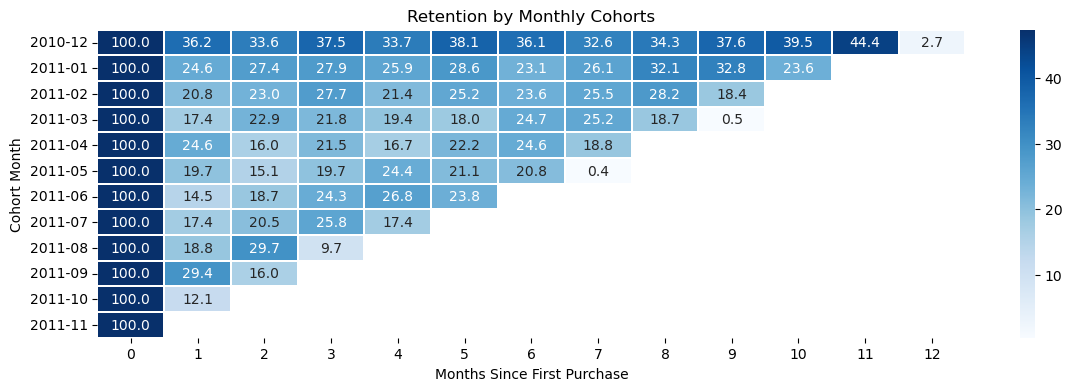

In [65]:
# Agrupar os dados de transa√ß√µes por m√™s de coorte e meses desde o primeiro
cohort_data = base_cohort.groupby(['cohort_month', 'months_since_first'])['CustomerID'].nunique().unstack(fill_value=0)

# Substituir zeros por NaN para melhor visualiza√ß√£o no heatmap
cohort_data = cohort_data.mask(cohort_data == 0)

# Calcular a reten√ß√£o percentual
# O primeiro valor de cada coorte (m√™s 0) √© usado como base
retention_percent = cohort_data.div(cohort_data.iloc[:, 0], axis=0) * 100  # Multiplica por 100 para converter em percentual

# Configurar o tamanho da figura
plt.figure(figsize=(14, 4))

# Configurar o t√≠tulo do gr√°fico
plt.title('Retention by Monthly Cohorts')

# Criar um heatmap com os dados de coorte
sns.heatmap(
    retention_percent.round(2),                   # Arredondar os valores para 2 casas decimais
    annot=True,                             # Mostrar os valores na c√©lula
    cmap="Blues",                           # Colormap
    vmax=list(retention_percent.max().sort_values(ascending=False))[1] + 3,  # Definir o valor m√°ximo para a colora√ß√£o
    fmt='.1f',                              # Formato dos valores anotados
    linewidths=0.3,                         # Largura das linhas que separam as c√©lulas
    yticklabels=retention_percent.index.strftime('%Y-%m')  # R√≥tulos do eixo y
)

# Ajustar os r√≥tulos do eixo y para que apare√ßam na horizontal
plt.yticks(rotation=0)  # Rotaciona os r√≥tulos do eixo y para 0 graus

# Adicionar r√≥tulos para os eixos
plt.xlabel('Months Since First Purchase')  # Legenda do eixo x
plt.ylabel('Cohort Month')                  # Legenda do eixo y

# Exibir o gr√°fico
plt.show()

Para o cohort de dezembro de 2010, a taxa de reten√ß√£o inicia em 100%, caindo para 36,2% no segundo m√™s (janeiro de 2011), indicando que cerca de 36% dos clientes iniciais ainda estavam ativos. Nos meses seguintes, a reten√ß√£o oscila, mas mant√©m uma tend√™ncia de redu√ß√£o, chegando a 2,7% no m√™s 12.

No cohort de janeiro de 2011, a reten√ß√£o tamb√©m come√ßa em 100%, mas cai rapidamente para 24,6% no segundo m√™s, alcan√ßando 23,6% no d√©cimo primeiro. Essa queda acentuada sugere menor engajamento entre os clientes adquiridos nesse per√≠odo.

Em geral, os cohorts mostram taxas de reten√ß√£o decrescentes ao longo do tempo, destacando um desafio constante em manter os clientes engajados.

### Taxa de reten√ß√£o (gr√°fico de safras)

Uma outra forma de analisar a taxa de reten√ß√£o √© por meio de "safras" apresentadas em gr√°fico. Nela, conseguimos visualizar e comparar melhor os cohorts mensais.

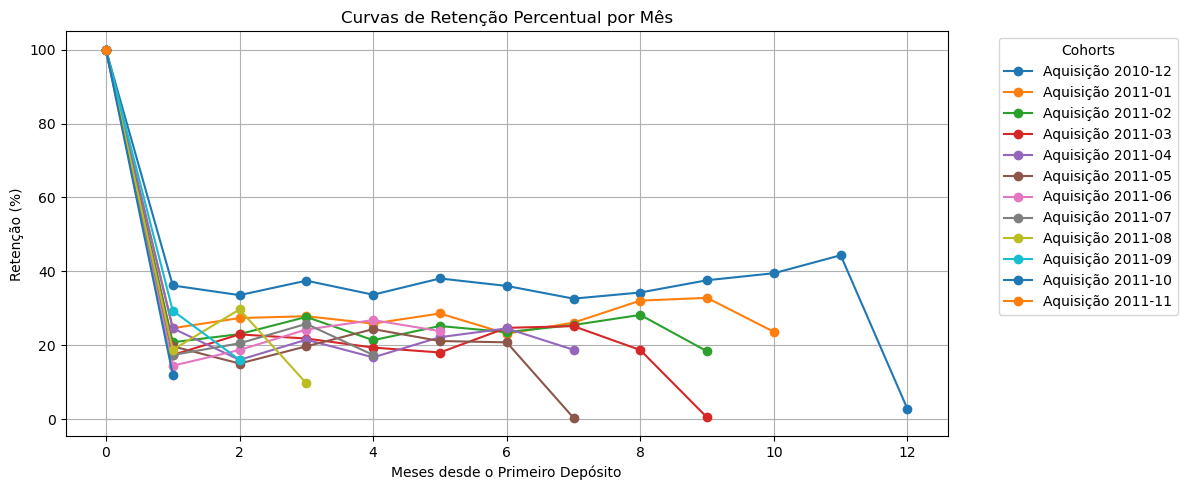

In [67]:
# Plotar a reten√ß√£o percentual com a m√©dia geral, desconsiderando zeros
def plot_retention(retention_table):
    plt.figure(figsize=(12, 5))
    # Usar mask para substituir zeros por NaN
    retention_table = retention_table.mask(retention_table == 0)
    
    for index, row in retention_table.iterrows():
        plt.plot(row.index, row.values, marker='o', label=f'Aquisi√ß√£o {index}')

    plt.title('Curvas de Reten√ß√£o Percentual por M√™s')
    plt.xlabel('Meses desde o Primeiro Dep√≥sito')
    plt.ylabel('Reten√ß√£o (%)')
    plt.xticks(rotation=0)
    plt.legend(title='Cohorts', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.tight_layout()
    plt.show()

# Plotar a reten√ß√£o percentual
plot_retention(retention_percent)

### Taxa de reten√ß√£o (m√©dia)

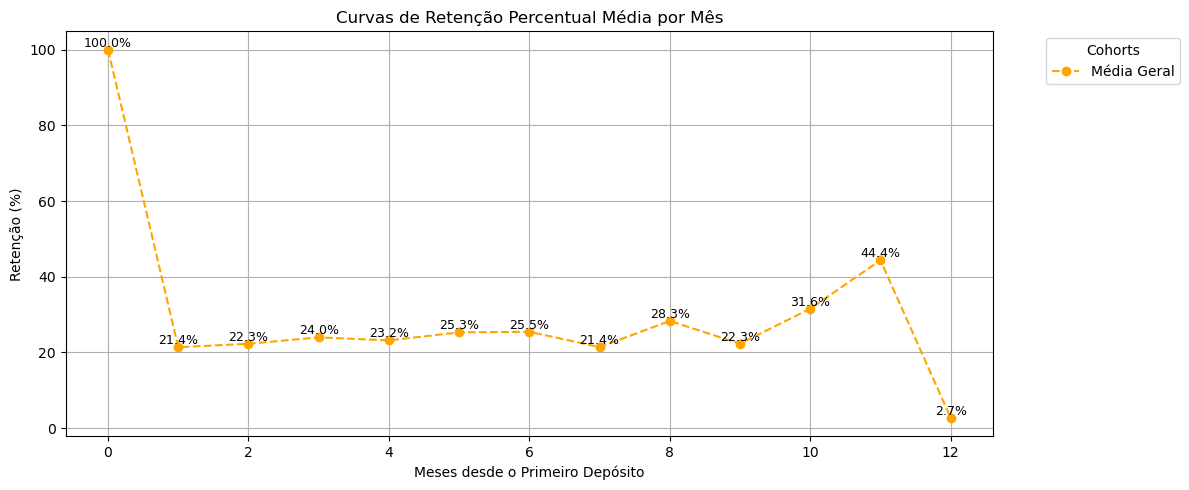

In [69]:
# Calcular a m√©dia geral de reten√ß√£o percentual desconsiderando zeros
average_retention = retention_percent.replace(0, np.nan).mean()

# Plotar a reten√ß√£o percentual apenas com a m√©dia geral
def plot_retention(average_retention):
    plt.figure(figsize=(12, 5))
    
    # Plotar m√©dia geral
    plt.plot(average_retention.index, average_retention.values, marker='o', color='orange', linestyle='--', label='M√©dia Geral')

    # Adicionar valores aos pontos
    for i, value in enumerate(average_retention.values):
        plt.text(average_retention.index[i], value, f'{value:.1f}%', 
                 ha='center', va='bottom', fontsize=9)

    plt.title('Curvas de Reten√ß√£o Percentual M√©dia por M√™s')
    plt.xlabel('Meses desde o Primeiro Dep√≥sito')
    plt.ylabel('Reten√ß√£o (%)')
    plt.xticks(rotation=0)
    plt.legend(title='Cohorts', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.tight_layout()
    plt.show()

# Plotar a m√©dia de reten√ß√£o percentual
plot_retention(average_retention)


A m√©dia das taxas de reten√ß√£o mostra que:
- Ap√≥s a primeira transa√ß√£o (100%), ocorre uma queda acentuada para cerca de 21,4% no m√™s seguinte, estabilizando entre 22% e 25% at√© o sexto m√™s.  
- O m√™s 8 se destaca com um leve aumento para 28,3%, sugerindo alguma interven√ß√£o positiva.  
- No m√™s 11, h√° um pico incomum de 44,4%, possivelmente devido a uma campanha ou a√ß√£o de reten√ß√£o eficaz, mas a taxa cai drasticamente para 2,7% no m√™s 12.

A an√°lise indica uma reten√ß√£o inst√°vel, com oportunidades para melhorar a fideliza√ß√£o ao longo do tempo.

### Planos de a√ß√£o

1. Como a reten√ß√£o cai logo ap√≥s a primeira compra, a√ß√µes de p√≥s-compra, como ofertas de frete gr√°tis na pr√≥xima compra, descontos exclusivos para recompra, ou sugest√µes de produtos complementares, podem ser enviadas por e-mail ou notifica√ß√µes push. O objetivo √© reduzir o tempo entre a primeira e a segunda compra.

2. Enviar recomenda√ß√µes personalizadas ou combos de produtos relacionados aos que o cliente j√° comprou pode aumentar o engajamento e melhorar as taxas de reten√ß√£o do terceiro ao sexto m√™s.

3. Aproveitar sazonalidades como Natal ou outras datas promocionais para impulsionar as compras em per√≠odos com menor reten√ß√£o. O aumento observado no m√™s 8 pode ser estudado para identificar pr√°ticas eficazes, como promo√ß√µes, e replic√°-las.

4. Criar um programa de fidelidade pode incentivar a recompra ao longo do ano. Oferecer benef√≠cios como pontos por compras, descontos acumulativos ou acesso antecipado a novos produtos pode manter o cliente ativo no e-commerce.

5. Para clientes que n√£o compram h√° mais de 6 meses, uma campanha de reativa√ß√£o com ofertas de retorno, como desconto de boas-vindas para compras de retorno, pode atrair esses consumidores de volta. Campanhas sazonais exclusivas para clientes inativos tamb√©m podem reengaj√°-los no e-commerce.

## Pareto

O princ√≠pio de Pareto, conhecido como regra 80/20, afirma que 80% dos efeitos v√™m de 20% das causas. Isso significa que, em diversas √°reas, uma pequena parcela das causas gera a maior parte dos resultados. Esse princ√≠pio pode ser aplicado em gest√£o de tempo, neg√≥cios, vendas e produtividade: normalmente, uma pequena por√ß√£o de tarefas, produtos ou clientes √© respons√°vel pela maior parte dos resultados ou lucros.

No dia a dia, o princ√≠pio pode ajudar a priorizar esfor√ßos e recursos, direcionando mais aten√ß√£o para o que traz mais retorno. Ao identificar e focar nesses elementos-chave, organiza√ß√µes e indiv√≠duos conseguem melhorar sua efici√™ncia, otimizar recursos e maximizar o impacto das a√ß√µes em v√°rias frentes.

### Pareto de clientes

Para criar o gr√°fico de Pareto, precisamos calcular o pre√ßo total, que √© obtido multiplicando o pre√ßo pela quantidade. Em seguida, somamos esse pre√ßo total para cada cliente. Depois disso, ordenamos os valores do maior para o menor e, por fim, calculamos a porcentagem acumulada para o gr√°fico de Pareto.

In [57]:
base["TotalPrice"] = base["Quantity"] * base["UnitPrice"]

base_pareto = base.copy()

In [73]:
# Agrupar por 'CustomerID', somar 'TotalPrice', ordenar em ordem decrescente
pareto_df = base_pareto.groupby('CustomerID')['TotalPrice'].sum().reset_index()
pareto_df = pareto_df.sort_values(by='TotalPrice', ascending=False).reset_index(drop=True) #.head(100)

# Calcular porcentagem acumulada para o gr√°fico de Pareto
pareto_df['Percentual acumulado'] = pareto_df['TotalPrice'].cumsum() / pareto_df['TotalPrice'].sum() * 100

# Calcular a quantidade e porcentagem de clientes que representam 80% e 90% da receita
num_customers_80pct = pareto_df[pareto_df['Percentual acumulado'] <= 80].shape[0]
percentage_customers_80pct = (num_customers_80pct / pareto_df.shape[0]) * 100

num_customers_90pct = pareto_df[pareto_df['Percentual acumulado'] <= 90].shape[0]
percentage_customers_90pct = (num_customers_90pct / pareto_df.shape[0]) * 100

# Criar o gr√°fico de Pareto com as linhas de 80% e 90% e anota√ß√£o ajustada para linha de porcentagem acumulada
fig, ax1 = plt.subplots(figsize=(14, 5))

# Barras para TotalPrice
ax1.bar(pareto_df['CustomerID'], pareto_df['TotalPrice'], color='skyblue')
ax1.set_xlabel('CustomerID')
ax1.set_ylabel('TotalPrice', color='skyblue')

# Linha para a porcentagem acumulada com uma linha mais fina
ax2 = ax1.twinx()
ax2.plot(pareto_df['CustomerID'], pareto_df['Percentual acumulado'], color='orange', linestyle='-', linewidth=1)  # Linha ajustada
ax2.set_ylabel('Percentual acumulado (%)', color='orange')

# Linhas de refer√™ncia para 80% e 90%
ax2.axhline(80, color='black', linestyle='--', linewidth=0.4)  # Linha de 80%
ax2.axhline(90, color='black', linestyle='--', linewidth=0.4)  # Linha de 90%

# Adicionar anota√ß√µes para 80% e 90% com ajustes na posi√ß√£o
ax2.annotate(f'{num_customers_80pct} clientes\n({percentage_customers_80pct:.1f}% da base)',
             xy=(num_customers_80pct, 80), xycoords='data',
             xytext=(num_customers_80pct + 1, 85), textcoords='data',  # Movido para cima
             arrowprops=dict(arrowstyle="->", lw=1.5, color='black'),
             color='black', fontsize=10)

ax2.annotate(f'{num_customers_90pct} clientes\n({percentage_customers_90pct:.1f}% da base)',
             xy=(num_customers_90pct, 90), xycoords='data',
             xytext=(num_customers_90pct + 1, 95), textcoords='data',  # Movido para cima
             arrowprops=dict(arrowstyle="->", lw=1.5, color='black'),
             color='black', fontsize=10)

# Ocultando os r√≥tulos do eixo x
ax1.set_xticks([])

plt.title('Pareto - Receita por cliente')
plt.show()

In [75]:
print(f"""
- Ao analisar o gr√°fico de Pareto dos clientes, observamos que {round(percentage_customers_80pct, 1)}% da base de clientes ({num_customers_80pct} clientes) √© respons√°vel por 80% do valor transacionado. Al√©m disso, {round(percentage_customers_90pct, 1)}% da base ({num_customers_90pct} clientes) responde por 90% do total transacionado.

- Esse resultado destaca a import√¢ncia de focar na reten√ß√£o e no engajamento desse grupo de clientes de alto valor. √â recomend√°vel implementar estrat√©gias personalizadas, como atendimento ao cliente diferenciado e programas de fidelidade, para reter esses clientes.

- Uma parte significativa da base de clientes n√£o contribui de forma proporcional para a receita. Isso representa uma oportunidade para desenvolver campanhas de marketing direcionadas que incentivem essas compras, al√©m de avaliar e aprimorar produtos ou servi√ßos que possam atrair uma maior participa√ß√£o desse grupo.

- Ter um resultado t√£o alto em poucos clientes pode representar um risco para a receita. Diversificar a base de clientes e entender os fatores que atraem os clientes de alto valor podem ajudar a criar um crescimento mais sustent√°vel e reduzir vulnerabilidades financeiras.
""")


- Ao analisar o gr√°fico de Pareto dos clientes, observamos que 34.4% da base de clientes (1454 clientes) √© respons√°vel por 80% do valor transacionado. Al√©m disso, 51.7% da base (2187 clientes) responde por 90% do total transacionado.

- Esse resultado destaca a import√¢ncia de focar na reten√ß√£o e no engajamento desse grupo de clientes de alto valor. √â recomend√°vel implementar estrat√©gias personalizadas, como atendimento ao cliente diferenciado e programas de fidelidade, para reter esses clientes.

- Uma parte significativa da base de clientes n√£o contribui de forma proporcional para a receita. Isso representa uma oportunidade para desenvolver campanhas de marketing direcionadas que incentivem essas compras, al√©m de avaliar e aprimorar produtos ou servi√ßos que possam atrair uma maior participa√ß√£o desse grupo.

- Ter um resultado t√£o alto em poucos clientes pode representar um risco para a receita. Diversificar a base de clientes e entender os fatores que atraem os client

### Pareto de produtos

Agora, iremos criar a vis√£o de Pareto para os produtos. O objetivo √© analisar quais s√£o os produtos mais consumidos e que geram mais receita para o e-commerce.

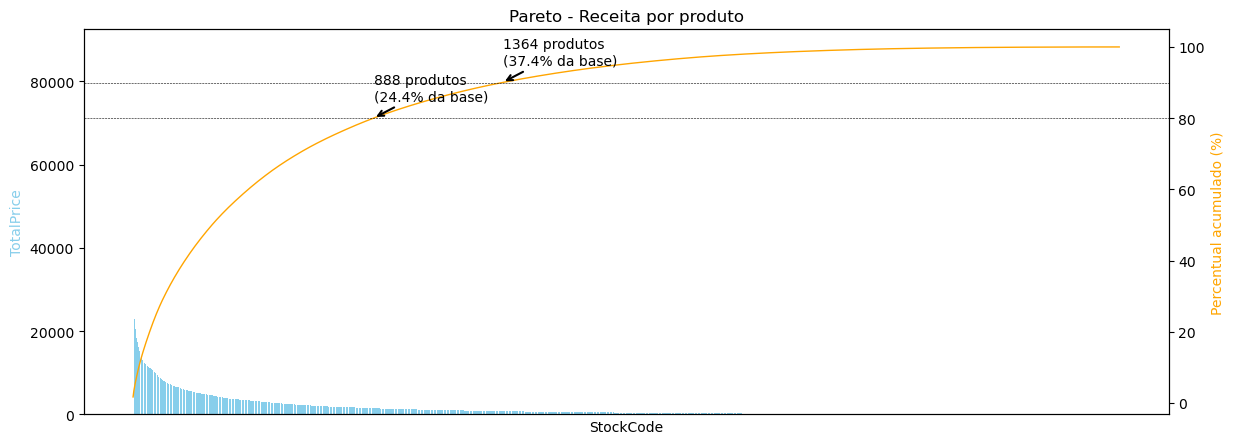

In [77]:
# Agrupar por 'StockCode', somar 'TotalPrice', ordenar em ordem decrescente
pareto_df = base_pareto.groupby('StockCode')['TotalPrice'].sum().reset_index()
pareto_df = pareto_df.sort_values(by='TotalPrice', ascending=False).reset_index(drop=True) #.head(100)

# Calcular porcentagem acumulada para o gr√°fico de Pareto
pareto_df['Percentual acumulado'] = pareto_df['TotalPrice'].cumsum() / pareto_df['TotalPrice'].sum() * 100

# Calcular a quantidade e porcentagem de produtos que representam 80% e 90% da receita
num_products_80pct = pareto_df[pareto_df['Percentual acumulado'] <= 80].shape[0]
percentage_products_80pct = (num_products_80pct / pareto_df.shape[0]) * 100

num_products_90pct = pareto_df[pareto_df['Percentual acumulado'] <= 90].shape[0]
percentage_products_90pct = (num_products_90pct / pareto_df.shape[0]) * 100

# Criar o gr√°fico de Pareto com as linhas de 80% e 90% e anota√ß√£o ajustada para linha de porcentagem acumulada
fig, ax1 = plt.subplots(figsize=(14, 5))

# Barras para TotalPrice
ax1.bar(pareto_df['StockCode'], pareto_df['TotalPrice'], color='skyblue')
ax1.set_xlabel('StockCode')
ax1.set_ylabel('TotalPrice', color='skyblue')

# Linha para a porcentagem acumulada com uma linha mais fina
ax2 = ax1.twinx()
ax2.plot(pareto_df['StockCode'], pareto_df['Percentual acumulado'], color='orange', linestyle='-', linewidth=1)  # Linha ajustada
ax2.set_ylabel('Percentual acumulado (%)', color='orange')

# Linhas de refer√™ncia para 80% e 90%
ax2.axhline(80, color='black', linestyle='--', linewidth=0.4)  # Linha de 80%
ax2.axhline(90, color='black', linestyle='--', linewidth=0.4)  # Linha de 90%

# Adicionar anota√ß√µes para 80% e 90% com ajustes na posi√ß√£o
ax2.annotate(f'{num_products_80pct} produtos\n({percentage_products_80pct:.1f}% da base)',
             xy=(num_products_80pct, 80), xycoords='data',
             xytext=(num_products_80pct + 1, 85), textcoords='data',  # Movido para cima
             arrowprops=dict(arrowstyle="->", lw=1.5, color='black'),
             color='black', fontsize=10)

ax2.annotate(f'{num_products_90pct} produtos\n({percentage_products_90pct:.1f}% da base)',
             xy=(num_products_90pct, 90), xycoords='data',
             xytext=(num_products_90pct + 1, 95), textcoords='data',  # Movido para cima
             arrowprops=dict(arrowstyle="->", lw=1.5, color='black'),
             color='black', fontsize=10)

# Ocultando os r√≥tulos do eixo x
ax1.set_xticks([])

plt.title('Pareto - Receita por produto')
plt.show()

In [79]:
# Exiba o texto formatado com as vari√°veis calculadas
print(f"""
Ao analisar a receita dos produtos, identificamos que {num_products_80pct} itens (representando {round(percentage_products_80pct,1)}% da base) s√£o respons√°veis por 80% da receita, enquanto {num_products_90pct} produtos (equivalente a {round(percentage_products_90pct,1)}% da base) contribuem com 90%.

Esse cen√°rio destaca a concentra√ß√£o de receita em um n√∫mero reduzido de produtos, sugerindo a necessidade de focar em estrat√©gias de marketing e vendas para esses itens. Al√©m disso, a grande quantidade de produtos que n√£o gera receita proporcional oferece uma oportunidade para revisar o mix de produtos, potencialmente descontinuando ou reposicionando os menos rent√°veis.
""")


Ao analisar a receita dos produtos, identificamos que 888 itens (representando 24.4% da base) s√£o respons√°veis por 80% da receita, enquanto 1364 produtos (equivalente a 37.4% da base) contribuem com 90%.

Esse cen√°rio destaca a concentra√ß√£o de receita em um n√∫mero reduzido de produtos, sugerindo a necessidade de focar em estrat√©gias de marketing e vendas para esses itens. Al√©m disso, a grande quantidade de produtos que n√£o gera receita proporcional oferece uma oportunidade para revisar o mix de produtos, potencialmente descontinuando ou reposicionando os menos rent√°veis.



## Segmenta√ß√£o de clientes com RFM

A an√°lise **RFM** (Rec√™ncia, Frequ√™ncia e Valor Monet√°rio) √© uma t√©cnica amplamente usada para segmentar clientes com base em seu comportamento de compra. Ela avalia tr√™s aspectos principais:

**Rec√™ncia (R)**: Refere-se ao tempo desde a √∫ltima compra do cliente. A ideia √© que clientes que compraram recentemente t√™m maior probabilidade de fazer outra compra. Assim, quanto menor o valor de rec√™ncia, melhor.

**Frequ√™ncia (F)**: Mede o n√∫mero de compras realizadas por um cliente em um determinado per√≠odo. Clientes que compram com frequ√™ncia tendem a ser mais engajados e leais, o que os torna importantes para estrat√©gias de reten√ß√£o.

**Valor Monet√°rio (M)**: Avalia o valor total gasto pelo cliente. Clientes com um valor monet√°rio alto s√£o valiosos para o neg√≥cio, uma vez que geram maior receita.

### Como Funciona a An√°lise RFM

Os clientes s√£o avaliados em cada uma dessas dimens√µes e recebem uma pontua√ß√£o para cada categoria, como notas de 1 a 5, em que:

- Para Rec√™ncia, valores menores indicam que o cliente comprou mais recentemente (e, portanto, √© mais valioso).
- Para Frequ√™ncia e Monet√°rio, valores mais altos indicam clientes que compram frequentemente ou gastam mais.

Essas pontua√ß√µes permitem agrupar os clientes com base em seus comportamentos e criar um score combinado (RFM), geralmente uma combina√ß√£o das tr√™s pontua√ß√µes.

Em nosso projeto, a base √© dividida em quintis, o que significa que os clientes s√£o agrupados em cinco grupos com base em sua frequ√™ncia de transa√ß√µes, sendo que cada grupo cont√©m aproximadamente 20% dos dados.


### Segmentos da An√°lise RFM

Esses segmentos ajudam a classificar os clientes de acordo com suas pontua√ß√µes RFM:

1. **Hibernando**: Clientes com baixa rec√™ncia e baixa frequ√™ncia.
2. **Em Risco**: Clientes com baixa rec√™ncia e m√©dia a alta frequ√™ncia, que podem estar pr√≥ximos de se tornarem inativos.
3. **Quase Inativo**: Clientes com frequ√™ncia baixa e rec√™ncia m√©dia, ainda ativos mas pouco engajados.
4. **Clientes Fi√©is**: Clientes com rec√™ncia e frequ√™ncia moderadas a altas, com bom hist√≥rico de engajamento.
5. **Novos Clientes**: Clientes muito recentes e com frequ√™ncia inicial baixa.
6. **Potencialmente Fi√©is**: Clientes com frequ√™ncia boa e rec√™ncia m√©dia, com potencial para fideliza√ß√£o.
7. **Campe√µes**: Clientes com rec√™ncia, frequ√™ncia e valor monet√°rio altos, representando os mais valiosos para a empresa.

No nosso projeto, optamos por utilizar apenas Recency (R) e Frequency (F) para simplificar o modelo. Al√©m de facilitar a an√°lise, essa escolha permite focar em m√©tricas que promovem um relacionamento cont√≠nuo com os clientes. A Recency nos ajuda a entender a √∫ltima intera√ß√£o do cliente, enquanto a Frequency destaca a import√¢ncia da lealdade, capturando a recorr√™ncia de compras.

In [59]:
# Realizando o group by em v√°rias vari√°veis e aplicando m√∫ltiplas fun√ß√µes de agrega√ß√£o
base_segmentacao = base.groupby(['CustomerID']).agg(
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum'),
    InvoiceDate_max=('InvoiceDate', 'max')).reset_index()

# Criando a coluna de rec√™ncia em uma linha
base_segmentacao['Recency'] = (base_segmentacao['InvoiceDate_max'].max() + dt.timedelta(days=1) - base_segmentacao['InvoiceDate_max']).dt.days

base_segmentacao = base_segmentacao.drop(columns=['InvoiceDate_max'])

# R_score: menor recency = melhor
# Usar qcut e lidar com a possibilidade de bordas duplicadas
base_segmentacao['R_score'] = pd.qcut(base_segmentacao['Recency'], q=5, labels=False, duplicates='drop') + 1
base_segmentacao['R_score'] = 6 - base_segmentacao['R_score']  # Inverte a pontua√ß√£o de R_score

# F_score: maior frequency = melhor
base_segmentacao['F_score'] = pd.qcut(base_segmentacao['Frequency'], q=5, labels=False, duplicates='drop') + 1

# M_score: maior monetary = melhor
base_segmentacao['M_score'] = pd.qcut(base_segmentacao['Monetary'], q=5, labels=False, duplicates='drop') + 1

# RFM Score
base_segmentacao["rfm_score"] = (base_segmentacao['R_score'].astype(str) + base_segmentacao['F_score'].astype(str))

# Aqui, um dicion√°rio √© criado, 
# As chaves s√£o express√µes regulares que representam diferentes combina√ß√µes de scores R e F, e os valores s√£o os segmentos rfm.
# As express√µes regulares permitem identificar padr√µes nos scores.
seg_map = {
    r'[1-2][1-2]': 'hibernando',
    r'[1-2][3-5]': 'em_risco',
    r'[3-4][1-2]': 'quase_inativo',
    r'[3-4][3-5]': 'clientes_fi√©is',
    r'5[1-2]': 'novos_clientes',
    r'[4-5][2-3]': 'potencialmente_fi√©is',
    r'5[4-5]': 'campe√µes'
}
base_segmentacao['segment'] = base_segmentacao['rfm_score'].replace(seg_map, regex=True)

base_segmentacao.head()

CustomerID  Frequency  Monetary  ...  M_score  rfm_score         segment
0      12347          7   3643.58  ...        5         54        campe√µes
1      12348          3     90.20  ...        1         12      hibernando
2      12349          1   1367.55  ...        4         41   quase_inativo
3      12350          1    294.40  ...        2         11      hibernando
4      12352          7   1385.74  ...        4         34  clientes_fi√©is

[5 rows x 9 columns]

### Correla√ß√µes

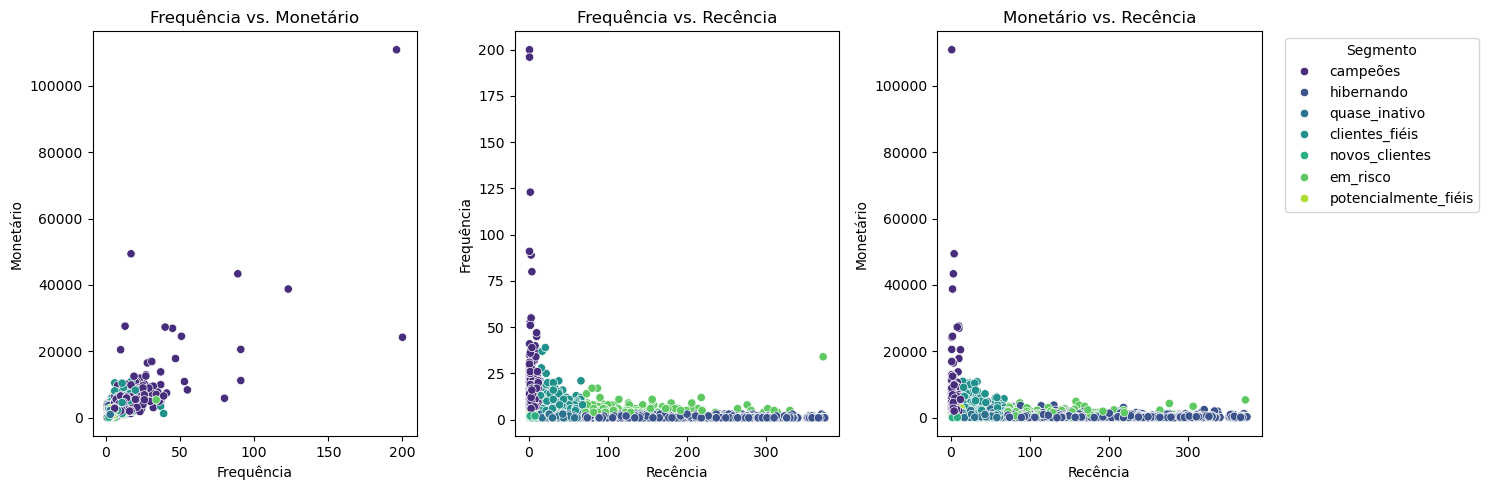

In [61]:
# Criar gr√°ficos de dispers√£o
plt.figure(figsize=(15, 5))

# Frequ√™ncia vs. Monet√°rio
plt.subplot(1, 3, 1)
sns.scatterplot(data=base_segmentacao, x='Frequency', y='Monetary', hue='segment', palette='viridis', legend=False)
plt.title('Frequ√™ncia vs. Monet√°rio')
plt.xlabel('Frequ√™ncia')
plt.ylabel('Monet√°rio')

# Frequ√™ncia vs. Rec√™ncia
plt.subplot(1, 3, 2)
sns.scatterplot(data=base_segmentacao, x='Recency', y='Frequency', hue='segment', palette='viridis', legend=False)
plt.title('Frequ√™ncia vs. Rec√™ncia')
plt.xlabel('Rec√™ncia')
plt.ylabel('Frequ√™ncia')

# Monet√°rio vs. Rec√™ncia
plt.subplot(1, 3, 3)
sns.scatterplot(data=base_segmentacao, x='Recency', y='Monetary', hue='segment', palette='viridis')
plt.title('Monet√°rio vs. Rec√™ncia')
plt.xlabel('Rec√™ncia')
plt.ylabel('Monet√°rio')
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Ao analisar a rela√ß√£o entre frequ√™ncia e valor monet√°rio, observamos que os ‚Äúusu√°rios campe√µes‚Äù se destacam por apresentarem as maiores frequ√™ncias de compra e valores monet√°rios, indicando uma rela√ß√£o forte entre engajamento e gasto.

Na an√°lise de frequ√™ncia versus rec√™ncia, notamos que esses mesmos campe√µes tamb√©m exibem as menores rec√™ncias e maiores frequ√™ncias, o que refor√ßa seu engajamento. Al√©m disso, conseguimos identificar novos clientes, que apresentam tanto uma baixa rec√™ncia (compraram recentemente) quanto uma baixa frequ√™ncia (ainda est√£o no in√≠cio de suas compras).

Por fim, ao analisar apenas o valor monet√°rio, observamos um padr√£o semelhante aos gr√°ficos anteriores, onde os clientes com maior valor gasto se alinham com os grupos de maior frequ√™ncia e menor rec√™ncia, consolidando o perfil dos clientes mais valiosos e engajados.

### An√°lise dos Segmentos de Clientes

In [63]:
# Realizando o group by em v√°rias vari√°veis e aplicando m√∫ltiplas fun√ß√µes de agrega√ß√£o
resumo_rfm = base_segmentacao.groupby(['segment']).agg(
    Size = ('CustomerID','count'),
    Frequency=('Frequency', 'mean'),
    Monetary=('Monetary', 'mean'),
    Recency=('Recency', 'mean'))

resumo_rfm[['Frequency', 'Monetary', 'Recency']] = resumo_rfm[['Frequency', 'Monetary', 'Recency']].round(1)

resumo_rfm.T

segment    campe√µes  clientes_fi√©is  ...  potencialmente_fi√©is  quase_inativo
Size          413.0           649.0  ...                 169.0         1044.0
Frequency      15.1             7.0  ...                   4.4            1.8
Monetary     4687.5          2198.9  ...                1356.3          547.0
Recency         5.8            33.1  ...                   6.6           39.7

[4 rows x 7 columns]

- **Campe√µes** e **Clientes Fi√©is** s√£o os mais lucrativos, sendo prioridade em estrat√©gias de fideliza√ß√£o e benef√≠cios exclusivos.

- **Em Risco** e **Quase Inativo** precisam de est√≠mulos de reengajamento para evitar perdas.

- **Hibernando** pode necessitar de uma abordagem de revitaliza√ß√£o mais intensa, ou at√© ser exclu√≠do de campanhas direcionadas, dependendo do custo-benef√≠cio.

- **Novos Clientes** e **Potencialmente Fi√©is** s√£o oportunidades para convers√£o em clientes regulares.

## Clusteriza√ß√£o

O K-means √© uma t√©cnica de **clusteriza√ß√£o de dados** utilizada para agrupar conjuntos de dados em clusters, ou seja, grupos de pontos com caracter√≠sticas semelhantes. √â uma t√©cnica de **aprendizado n√£o supervisionado**, o que significa que o modelo encontra os grupos com base apenas nos dados e nas suas similaridades internas, sem conhecimento pr√©vio de r√≥tulos ou classes.

### Como funciona o K-means?

O K-means agrupa os dados em **K** clusters, onde **K** √© um n√∫mero definido pelo usu√°rio. O algoritmo tenta minimizar a soma das dist√¢ncias dos pontos at√© o centro (centr√≥ide) de cada cluster, formando agrupamentos de dados compactos e bem definidos. O K-means garante uma solu√ß√£o onde a variabilidade dentro dos clusters √© minimizada, resultando em grupos coesos.

### Vantagens do K-means

- **Simplicidade e efici√™ncia**: O K-means √© intuitivo e r√°pido, principalmente com grandes conjuntos de dados, o que o torna uma escolha comum para an√°lise explorat√≥ria de dados e segmenta√ß√£o.
- **Escalabilidade**: A t√©cnica √© escal√°vel e pode ser aplicada a grandes volumes de dados.
- **Flexibilidade**: K-means pode ser usado para uma ampla gama de problemas, desde a segmenta√ß√£o de clientes at√© a detec√ß√£o de padr√µes em imagens.

### Desafios e Limita√ß√µes

- **N√∫mero de clusters pr√©-definido**: Uma das limita√ß√µes mais conhecidas √© que o n√∫mero de clusters \( K \) precisa ser definido previamente. Nem sempre √© claro quantos clusters representam melhor os dados, e m√©todos como o **Elbow Method** (Cotovelo) ou a **Silhouette Analysis** (Silhueta) s√£o usados para ajudar nessa decis√£o.
- **Sensibilidade √† inicializa√ß√£o**: Como o algoritmo inicia com centr√≥ides aleat√≥rios, ele pode encontrar diferentes resultados em cada execu√ß√£o. T√©cnicas como **K-means++** melhoram essa inicializa√ß√£o, levando a clusters mais consistentes.
- **Forma e densidade dos clusters**: K-means funciona melhor quando os clusters s√£o esf√©ricos e t√™m tamanhos e densidades semelhantes. Se os clusters tiverem formas ou tamanhos variados, o algoritmo pode n√£o performar bem.

### Elbow Method (Cotovelo)

O m√©todo do cotovelo avalia a soma das dist√¢ncias ao quadrado (in√©rcia) entre os pontos e seus respectivos centr√≥ides para diferentes quantidades de clusters (k). Ao calcular a in√©rcia para v√°rios valores de k e plotar esses resultados, busca-se o ponto onde a redu√ß√£o de in√©rcia come√ßa a diminuir significativamente ‚Äî formando um "cotovelo" no gr√°fico. Esse ponto indica um n√∫mero de clusters onde a adi√ß√£o de mais clusters n√£o melhora significativamente a qualidade do agrupamento, sugerindo que esse √© o n√∫mero ideal de clusters.

In [93]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecionando as vari√°veis e padronizando
X = base_segmentacao[['Frequency', 'Monetary', 'Recency']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculando a in√©rcia para diferentes valores de k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Defina o n√∫mero ideal de clusters desejado
k_ideal = 4

# Plotando o gr√°fico do m√©todo do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.axvline(x=k_ideal, color='red', linestyle='--', label=f'k = {k_ideal}')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('In√©rcia')
plt.title('M√©todo do Cotovelo para Definir o N√∫mero de Clusters')
plt.legend()
plt.show()

In [70]:
inertia

[12684.000000000005,
 9009.892644193525,
 5849.5416674739,
 3788.1106563683616,
 3077.319970313928,
 2653.2083305512156,
 1995.7610103443712,
 1691.296307815754,
 1493.9536940052035,
 1401.0110942221488]

Para essa lista de in√©rcia, os valores sugerem que 4 ou 5 clusters s√£o apropriados para capturar a estrutura dos dados sem prejudicar a simplicidade do modelo.

### Silhouette Analysis (Silhueta)

O m√©todo da silhueta mede a coes√£o e a separa√ß√£o dos clusters. A silhueta varia entre -1 e 1, onde valores pr√≥ximos de 1 indicam que os pontos est√£o bem agrupados dentro de seu cluster e distantes de outros clusters, valores pr√≥ximos de 0 sugerem que os pontos est√£o em bordas entre clusters e valores negativos indicam que os pontos podem estar no cluster errado. Ao calcular o coeficiente de silhueta m√©dio para diferentes valores de k, o n√∫mero de clusters ideal √© aquele que maximiza o valor m√©dio da silhueta, indicando uma boa separa√ß√£o entre os clusters.

In [73]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculando a pontua√ß√£o da silhueta para diferentes valores de k
silhouette_scores = []
k_range = range(2, 11)  # Come√ßamos de 2 porque k=1 n√£o √© aplic√°vel para silhueta

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.axvline(x=4, color='red', linestyle='--', label='k = 4')  # Linha pontilhada em vermelho no k=4
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('Pontua√ß√£o M√©dia da Silhueta')
plt.title('An√°lise da Silhueta para Determinar o N√∫mero Ideal de Clusters')
plt.show()


In [316]:
silhouette_scores

[0.523916243174347,
 0.5368619419747467,
 0.5841592736349628,
 0.523470159214007,
 0.48401365776868954,
 0.48393066947472435,
 0.4810424069062999,
 0.4413921807670107,
 0.44851023586638383]

Esses valores representam as pontua√ß√µes m√©dias de silhueta para diferentes n√∫meros de clusters, variando de 
k=2 a ùëò = 10.

Com base nos valores, temos a seguinte interpreta√ß√£o:

O valor mais alto de silhueta ocorre com k=4 (0.584), indicando que quatro clusters podem ser a melhor escolha, com a maior coes√£o e separa√ß√£o entre os clusters. Para ùëò>4, as pontua√ß√µes de silhueta come√ßam a diminuir, indicando que mais clusters come√ßam a gerar sobreposi√ß√£o entre grupos, enfraquecendo a defini√ß√£o dos clusters.
Portanto, quatro clusters parecem ser a quantidade ideal para este conjunto de dados, pois maximizam a pontua√ß√£o de silhueta, sugerindo uma boa separa√ß√£o e estrutura clara entre os clusters.

In [80]:
kmeans = KMeans(n_clusters=k_ideal, random_state=42)
base_segmentacao['Cluster'] = kmeans.fit_predict(X_scaled)+1

In [82]:
# Visualizando os resultados
#base_segmentacao[['CustomerID', 'Frequency', 'Monetary', 'Recency', 'Cluster']]

base_segmentacao.groupby(['Cluster']).agg(
    Size = ('CustomerID','count'),
    Frequency=('Frequency', 'mean'),
    Monetary=('Monetary', 'mean'),
    Recency=('Recency', 'mean'))

Size   Frequency      Monetary     Recency
Cluster                                            
1        2906    3.459050    997.671917   43.645217
2        1062    1.530132    386.173588  246.810734
3           4  152.000000  54299.682500    1.750000
4         256   19.050781   6483.917891   13.496094

### Resumo da An√°lise
- **Cluster 1**: Base de clientes moderadamente ativos com compras espor√°dicas e gasto m√©dio.
- **Cluster 2**: Clientes inativos ou com engajamento m√≠nimo, que contribuem menos para a receita.
- **Cluster 3**: Grupo VIP, muito valioso, com alt√≠ssima frequ√™ncia e gasto, e rec√™ncia quase imediata.
- **Cluster 4**: Clientes leais, de alto valor, com boa frequ√™ncia e gasto, tamb√©m bastante ativos.

### Implica√ß√µes para Estrat√©gias de Marketing
- **Cluster 1**: Manter a frequ√™ncia de compras e engajamento pode ser interessante por meio de campanhas promocionais e ofertas personalizadas para aumentar o valor m√©dio de gasto.
- **Cluster 2**: Estrat√©gias de reativa√ß√£o, como descontos exclusivos, podem ajudar a incentivar esses clientes a retornarem.
- **Cluster 3**: Esses clientes VIPs podem ser beneficiados com programas de fidelidade e experi√™ncias exclusivas.
- **Cluster 4**: Fortalecer a rela√ß√£o com esses clientes leais atrav√©s de benef√≠cios e conte√∫do exclusivo √© uma boa estrat√©gia para mant√™-los engajados.

## Conclus√£o

Neste projeto de an√°lise de clientes de e-commerce, integramos as abordagens de *Cohort*, *Pareto*, *RFM* e *clusteriza√ß√£o*, proporcionando uma vis√£o completa sobre o comportamento e valor dos clientes. 

### Conclus√£o do Projeto
- **An√°lise de Cohort**: Identificou taxas de reten√ß√£o e fidelidade, apontando per√≠odos cr√≠ticos de queda, permitindo interven√ß√µes para reten√ß√£o.
  
- **An√°lise de Pareto**: Aplicando o princ√≠pio 80/20, destacamos o grupo de clientes mais valioso, fundamental para a sa√∫de financeira do e-commerce.

- **An√°lise RFM**: Segmentou os clientes por rec√™ncia, frequ√™ncia e valor monet√°rio, destacando os mais leais e potenciais inativos, indicando oportunidades de personaliza√ß√£o e reten√ß√£o.

- **Clusteriza√ß√£o de Clientes**: Usando KMeans, agrupamos clientes em clusters assim como na an√°lise RFM, facilitando estrat√©gias de marketing direcionadas. 

Essas t√©cnicas, juntas, permitiram uma maior compreens√£o sobre as din√¢micas de compra, ajudando a definir a√ß√µes personalizadas para fidelizar e aumentar o valor do cliente.

## Refer√™ncias

- https://www.kaggle.com/code/mustafacicek/detailed-marketing-cohort-pareto-rfm-forecast/notebook
- https://www.kaggle.com/code/farzadnekouei/customer-segmentation-recommendation-system
- https://medium.com/analytics-vidhya/e-commerce-data-exploratory-data-analysis-eda-99b17cf53765
- https://amplitude.com/blog/how-to-calculate-retention-rate-b2b-saas